# Support Vector Machines - team Euler

In [12]:
from toepassing_procedures import *
import numpy as np
# data inladen
import pandas as pd
from pandas import read_csv
# grafieken
from matplotlib import pyplot as plt
from matplotlib import rc

from sklearn.datasets import load_breast_cancer

### Toegepast op de tumordata

In [13]:
# We laden de data
gegevens = read_csv('breast_cancer.csv')

# verander 0 in -1 en laat 1 staan
gegevens['diagnose'] = gegevens['diagnose'].replace(0, -1)

In [14]:
print(gegevens.columns)

Index(['diagnose', 'mean radius', 'mean texture', 'mean perimeter',
       'mean area', 'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [15]:
diagnoses = gegevens['diagnose'].values

print(diagnoses)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1 -1  1 -1 -1  1  1  1  1 -1  1
 -1 -1  1 -1  1 -1 -1  1  1  1 -1 -1  1 -1 -1 -1  1  1  1 -1  1  1 -1 -1
  1  1  1 -1 -1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1 -1 -1 -1
  1 -1 -1  1  1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1  1  1 -1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1 -1  1 -1  1  1 -1
 -1  1  1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1  1 -1  1 -1  1  1  1 -1  1
  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1  1  1 -1  1 -1 -1 -1 -1
  1  1 -1 -1  1  1  1 -1  1  1  1  1  1 -1 -1  1  1 -1  1  1 -1 -1  1 -1
  1  1  1  1 -1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1 -1  1 -1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1 -1  1 -1  1  1  1  1 -1

In [16]:
data = gegevens.drop(['diagnose'], axis=1)

print(data)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

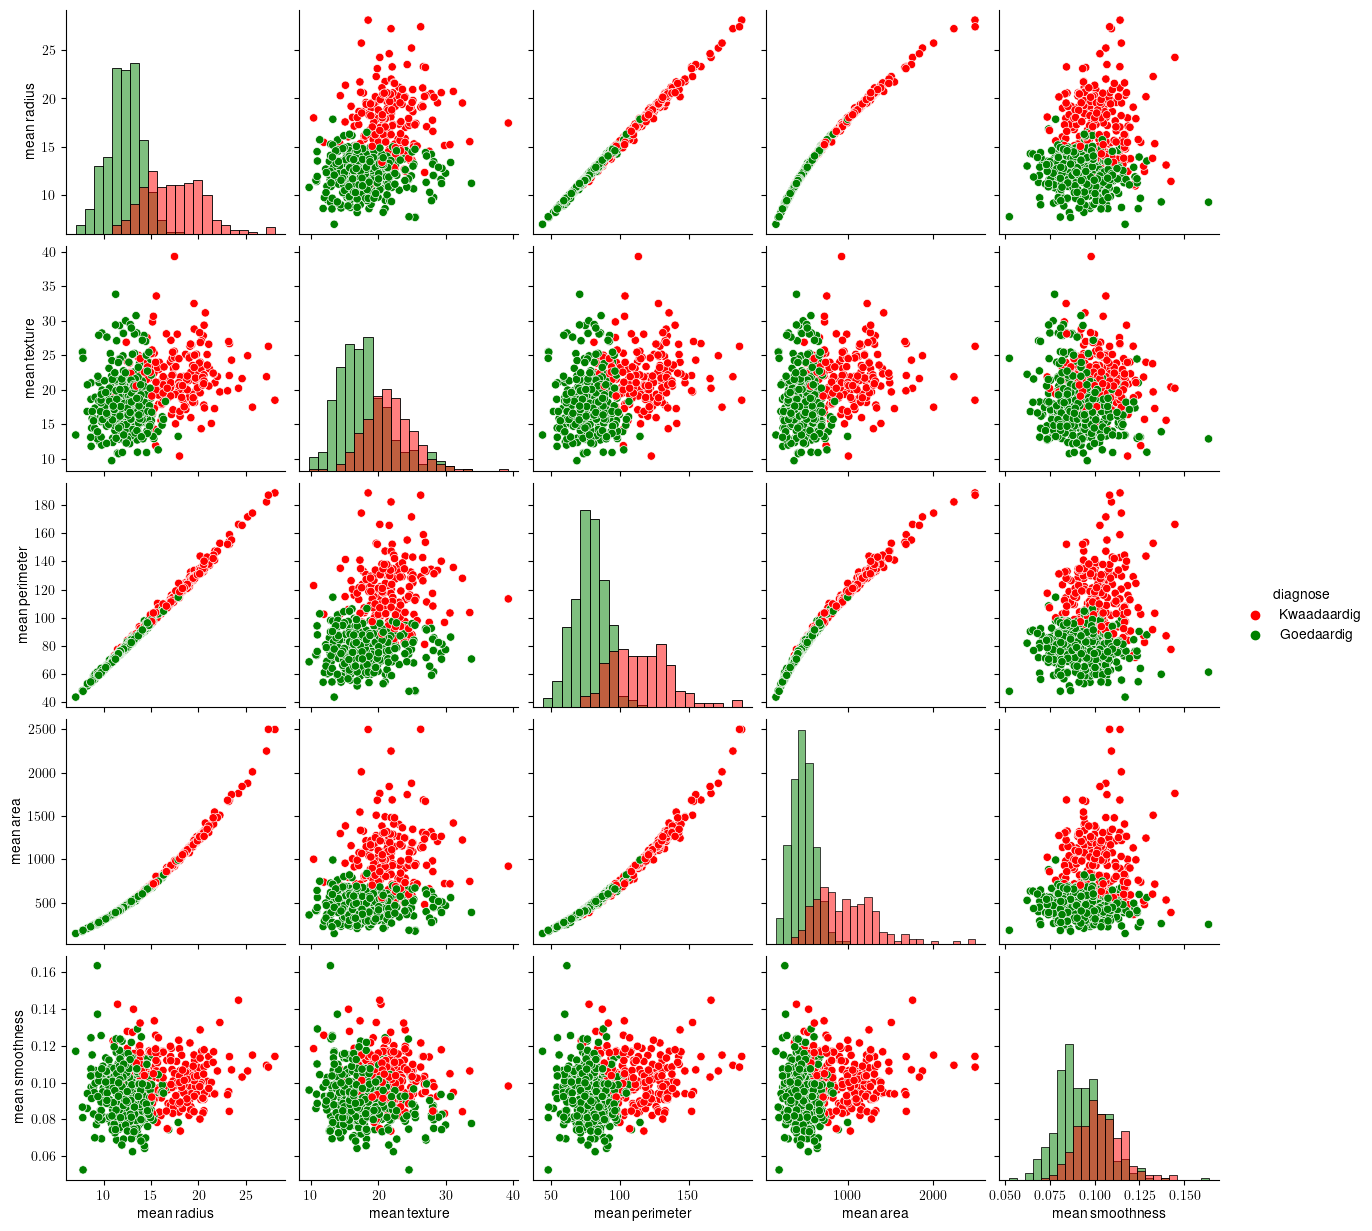

In [17]:
import seaborn as sns

diagnosesInWoorden = gegevens.copy()
diagnosesInWoorden['diagnose'] = gegevens['diagnose'].map({-1: 'Kwaadaardig', 1: 'Goedaardig'})

# we doen een sns pairplot met de eerste 5 features in de kleuren groen en rood
# 1 = goedaardig in de legende, 0 = kwaadaardig
sns.pairplot(diagnosesInWoorden,vars=diagnosesInWoorden.columns[1:6], hue="diagnose", palette=["r","g"], height=2.5,diag_kind="hist")

# schrijf de plot naar een bestand
plt.savefig('pairplot.pdf')

In [18]:

feature1 = 'mean texture'
feature2 = 'mean radius'

featureIndices = [gegevens.columns.get_loc(feature1), gegevens.columns.get_loc(feature2)]

X = gegevens.iloc[:, featureIndices].values
y = gegevens.iloc[:, 0].values

print(X)
print(y)

[[10.38 17.99]
 [17.77 20.57]
 [21.25 19.69]
 ...
 [28.08 16.6 ]
 [29.33 20.6 ]
 [24.54  7.76]]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1 -1  1 -1 -1  1  1  1  1 -1  1
 -1 -1  1 -1  1 -1 -1  1  1  1 -1 -1  1 -1 -1 -1  1  1  1 -1  1  1 -1 -1
  1  1  1 -1 -1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1 -1 -1 -1
  1 -1 -1  1  1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1  1  1 -1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1 -1  1 -1  1  1 -1
 -1  1  1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1  1 -1  1 -1  1  1  1 -1  1
  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1  1  1 -1  1 -1 -1 -1 -1
  1  1 -1 -1  1  1  1 -1  1  1  1  1  1 -1 -1  1  1 -1  1  1 -1 -1  1 -1
  1  1  1  1 -1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1 -1  1 -1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1 

In [19]:
# splits in 50% train, 25% validatie en 25% test
trainingX, testX, trainingY, testY = train_test_split(X, y, test_size=0.25, random_state=42)
trainingX, validatieX, trainingY, validatieY = train_test_split(trainingX, trainingY, test_size=0.33, random_state=42)

print(trainingX.shape)
print(validatieX.shape)
print(testX.shape)

(285, 2)
(141, 2)
(143, 2)


De beste lambda is 0.7273636363636364
De accuraatheid bij deze lambda is 85.1063829787234


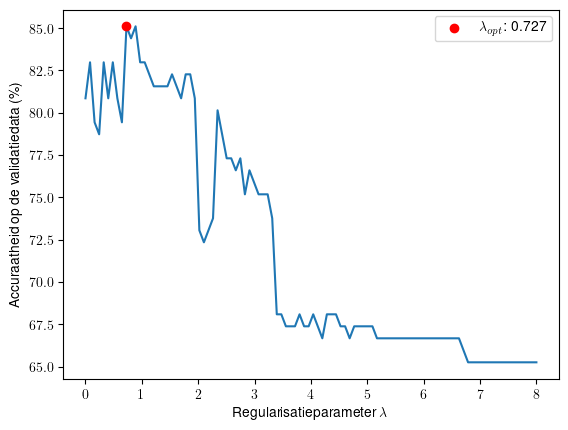

In [26]:
# we bepalen de optimale regulairisatieparameter lambda
mogelijkeLambdas = np.linspace(0.0001, 8, 100)
leerTempo = 0.001
aantalIteraties = 1000

accuraatheden = []

for lambdaParam in mogelijkeLambdas:
    w, b = fit(trainingX, trainingY, leerTempo, lambdaParam, aantalIteraties)
    voorsp = voorspelling(validatieX, w, b)
    accuraatheden.append(accuraatheid(voorsp, validatieY, w, b))

besteLambda = mogelijkeLambdas[accuraatheden.index(max(accuraatheden))]
print(f"De beste lambda is {besteLambda}")
print(f"De accuraatheid bij deze lambda is {max(accuraatheden)}")

# we plotten de accurraatheid tegen de lambda
plt.figure()

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

plt.plot(mogelijkeLambdas, accuraatheden)
plt.scatter(besteLambda, max(accuraatheden), color='red', label="$\lambda_{opt}$: %.3f"%besteLambda, zorder=10)
plt.xlabel('Regularisatieparameter $\lambda$')
plt.ylabel('Accuraatheid op de validatiedata (\%)')
plt.legend()
plt.savefig('accuraatheid.pdf')

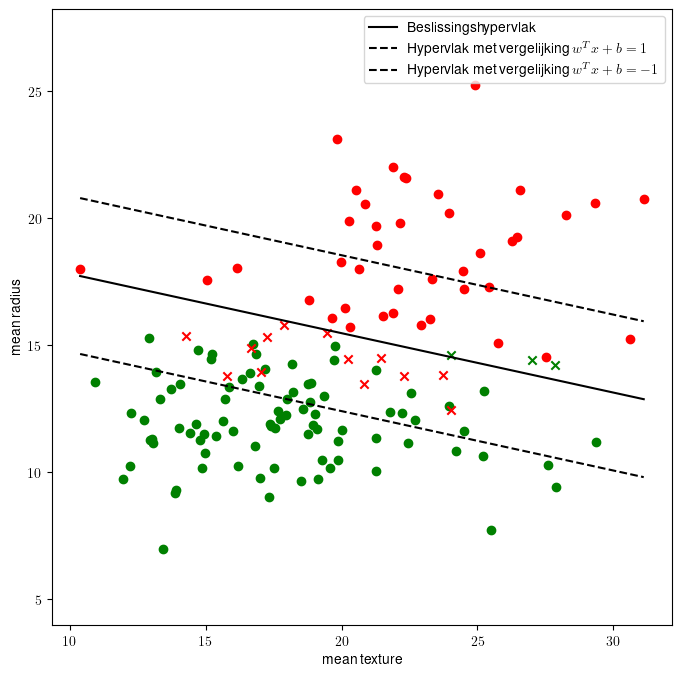

In [25]:
lambdaOpt = 0.7273636363636364
leerTempo = 0.001
aantalIteraties = 1000

# we trainen het model met de optimale lambda
w, b = fit(trainingX, trainingY, leerTempo, lambdaOpt, aantalIteraties)

voorsp = voorspelling(testX, w, b)

truePositives = [testX[i] for i in range(len(testX)) if voorsp[i] == 1 and testY[i] == 1]
falsePositives = [testX[i] for i in range(len(testX)) if voorsp[i] == 1 and testY[i] == -1]
trueNegatives = [testX[i] for i in range(len(testX)) if voorsp[i] == -1 and testY[i] == -1]
falseNegatives = [testX[i] for i in range(len(testX)) if voorsp[i] == -1 and testY[i] == 1]

fig = plt.figure(figsize=(8, 8))

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

ax = fig.add_subplot(1, 1, 1)

plt.scatter([p[0] for p in truePositives], [p[1] for p in truePositives], marker="o", c="g")
plt.scatter([p[0] for p in falsePositives], [p[1] for p in falsePositives], marker="x", c="r")
plt.scatter([p[0] for p in trueNegatives], [p[1] for p in trueNegatives], marker="o", c="r")
plt.scatter([p[0] for p in falseNegatives], [p[1] for p in falseNegatives], marker="x", c="g")

x0_1 = min(testX[:, 0])
x0_2 = max(testX[:, 0])

x1_1 = hyperplaneFunctie(x0_1, w, b, 0)
x1_2 = hyperplaneFunctie(x0_2, w, b, 0)

x1_1_m = hyperplaneFunctie(x0_1, w, b, -1)
x1_2_m = hyperplaneFunctie(x0_2, w, b, -1)

x1_1_p = hyperplaneFunctie(x0_1, w, b, 1)
x1_2_p = hyperplaneFunctie(x0_2, w, b, 1)

ax.set_xlabel(feature1)
ax.set_ylabel(feature2)

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k", label="Beslissingshypervlak")
ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k--", label="Hypervlak met vergelijking $w^Tx + b = 1$")
ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k--", label="Hypervlak met vergelijking $w^Tx + b = -1$")

x1_min = np.amin(testX[:, 1])
x1_max = np.amax(testX[:, 1])
ax.set_ylim([x1_min - 3, x1_max + 3])

plt.legend()
plt.savefig("svm_nieuwe_tumor_data.pdf")
plt.show()

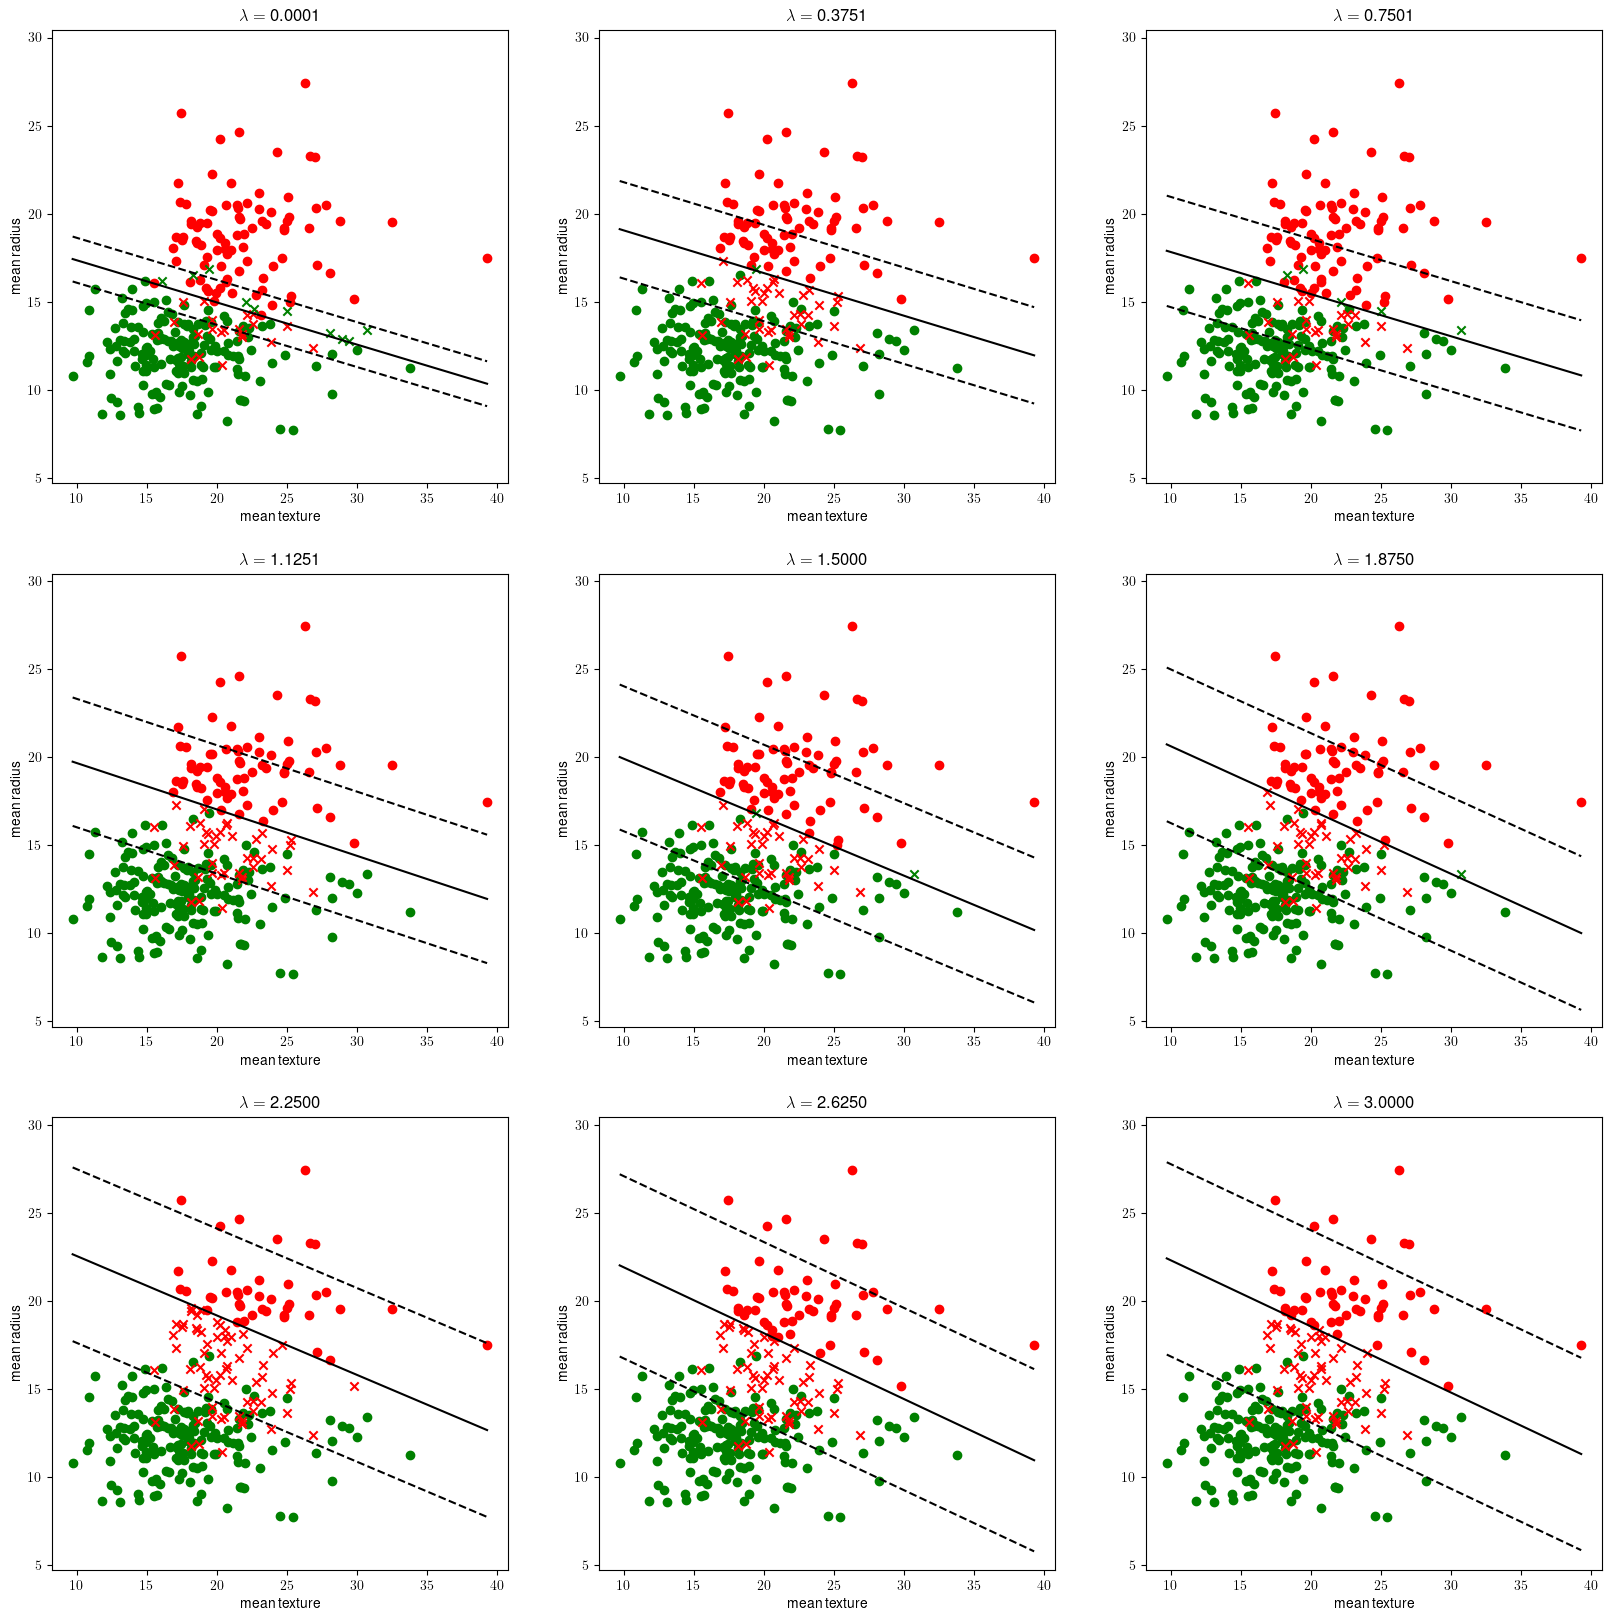

In [35]:
# 9 waarden voor lambda
mogelijkeLambdas = np.linspace(0.0001, 3, 9)

leerTempo = 0.001
aantalIteraties = 10000

fig = plt.figure(figsize=(20, 20))

for i, lambdaParam in enumerate(mogelijkeLambdas):

    w, b = fit(trainingX, trainingY, leerTempo, lambdaParam, aantalIteraties)
    voorsp = voorspelling(trainingX, w, b)

    truePositives = [trainingX[i] for i in range(len(trainingX)) if voorsp[i] == 1 and trainingY[i] == 1]
    falsePositives = [trainingX[i] for i in range(len(trainingX)) if voorsp[i] == 1 and trainingY[i] == -1]
    trueNegatives = [trainingX[i] for i in range(len(trainingX)) if voorsp[i] == -1 and trainingY[i] == -1]
    falseNegatives = [trainingX[i] for i in range(len(trainingX)) if voorsp[i] == -1 and trainingY[i] == 1]

    rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
    rc('text', usetex=True)

    ax = fig.add_subplot(3, 3, i+1)

    ax.set_title(f"$\lambda =$ %.4f"%lambdaParam)

    plt.scatter([p[0] for p in truePositives], [p[1] for p in truePositives], marker="o", c="g")
    plt.scatter([p[0] for p in falsePositives], [p[1] for p in falsePositives], marker="x", c="r")
    plt.scatter([p[0] for p in trueNegatives], [p[1] for p in trueNegatives], marker="o", c="r")
    plt.scatter([p[0] for p in falseNegatives], [p[1] for p in falseNegatives], marker="x", c="g")

    x0_1 = min(trainingX[:, 0])
    x0_2 = max(trainingX[:, 0])

    x1_1 = hyperplaneFunctie(x0_1, w, b, 0)
    x1_2 = hyperplaneFunctie(x0_2, w, b, 0)

    x1_1_m = hyperplaneFunctie(x0_1, w, b, -1)
    x1_2_m = hyperplaneFunctie(x0_2, w, b, -1)

    x1_1_p = hyperplaneFunctie(x0_1, w, b, 1)
    x1_2_p = hyperplaneFunctie(x0_2, w, b, 1)

    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "k", label="Beslissingshypervlak")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k--", label="Hypervlak met vergelijking $w^Tx + b = 1$")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k--", label="Hypervlak met vergelijking $w^Tx + b = -1$")

    x1_min = np.amin(trainingX[:, 1])
    x1_max = np.amax(trainingX[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])


plt.savefig("9_waarden_voor_lambda_training.pdf", bbox_inches='tight', pad_inches=0)
plt.show()